<a href="https://colab.research.google.com/github/Sahab00/uni_work_collab/blob/main/DM_skewness_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
train_data=pd.read_csv("train.csv")
train_data.sample(6)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q


In [ ]:
train_data.set_index('PassengerId',inplace=True)
#setting indexing of row

#droping column which are less useful
#train_data = train_data.drop('column_name', axis=1)
#train_data = train_data.drop(['Name', 'Ticket'], axis=1)


In [ ]:
#checking the no. of people survived titanic
print(train_data['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
#printing the records of 1st three values in the dataset for age and fare
print(['Age','Fare'],":Numeric attributes")
print("Some values of age are: ")
print(train_data['Age'][0:3])  #slicing
print("Some values of Fare are: ")
print(train_data['Fare'][0:3])

['Age', 'Fare'] :Numeric attributes
Some values of age are: 
PassengerId
1    22.0
2    38.0
3    26.0
Name: Age, dtype: float64
Some values of Fare are: 
PassengerId
1     7.2500
2    71.2833
3     7.9250
Name: Fare, dtype: float64


In [ ]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#printing unique values of data set
print('*' * 20, 'unique values in cabin','*' * 20)
print()
print(train_data['Cabin'].unique())

******************** unique values in cabin ********************

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24

In [ ]:
#finding % of missing data from training data
train_data.Cabin.isnull().sum()/len(train_data) * 100

77.10437710437711

In [ ]:
#null or missing data
train_data.Cabin.isnull().sum()

687

In [ ]:
train_data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
train_data.skew()

TypeError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [ ]:
train_data.select_dtypes(include=np.number).skew()


Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Text(0, 0.5, 'Skewness Value')

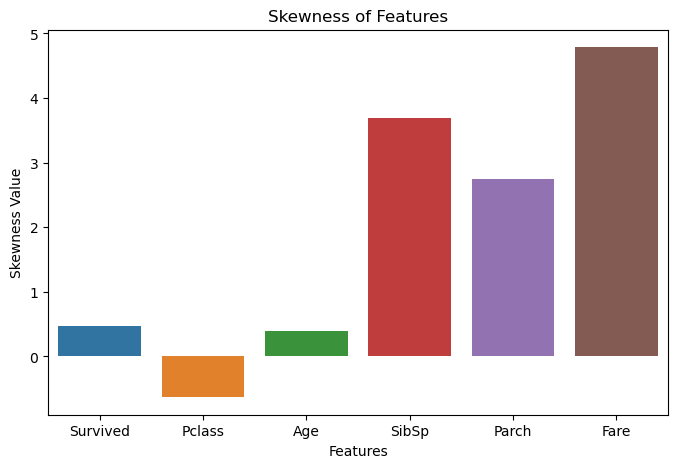

In [ ]:
#creating bar chart
skew_data={'Survived':0.478523,'Pclass':-0.630548,'Age':0.389108,'SibSp':3.695352,'Parch':2.749117,'Fare':4.787317}
#converting skew_data into pandas series
skew_series=pd.Series(skew_data)

#ploting the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=skew_series.index,y=skew_series.values)

plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness Value')

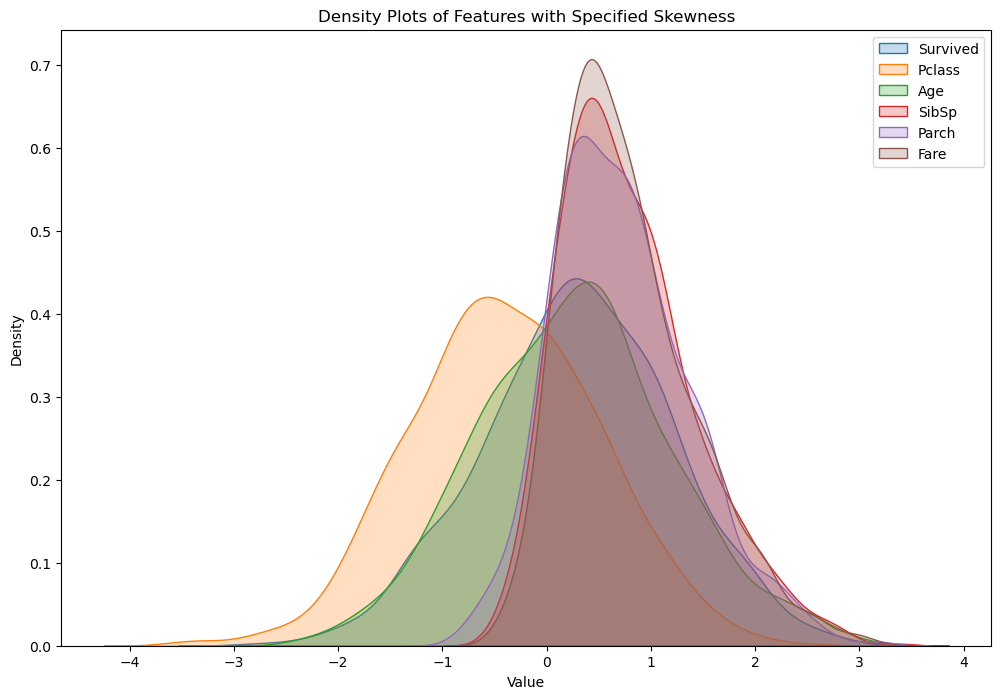

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm

# Set seed for reproducibility
np.random.seed(0)

# Define the skewness values for each feature
skewness_values = {
    'Survived': 0.478523,
    'Pclass': -0.630548,
    'Age': 0.389108,
    'SibSp': 3.695352,
    'Parch': 2.749117,
    'Fare': 4.787317
}

# Create synthetic data based on the skewness values
data = {}
for feature, skew in skewness_values.items():
    if skew >= 0:  # Positive skew
        data[feature] = skewnorm.rvs(a=skew, loc=0, scale=1, size=1000)
    else:  # Negative skew
        data[feature] = skewnorm.rvs(a=skew, loc=0, scale=1, size=1000)

df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create density plots for each feature
for feature in df.columns:
    sns.kdeplot(df[feature], fill=True, label=feature)

# Add titles and labels
plt.title('Density Plots of Features with Specified Skewness')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
